# 26.10 - Unsupervised Learning Challenge

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import warnings

warnings.filterwarnings('ignore')

In [6]:
#mnist = fetch_openml('Kuzushiji-MNIST', version=1, cache=True)

kmnist = np.load('kmnist-train-imgs.npz')['arr_0']

Display sample images

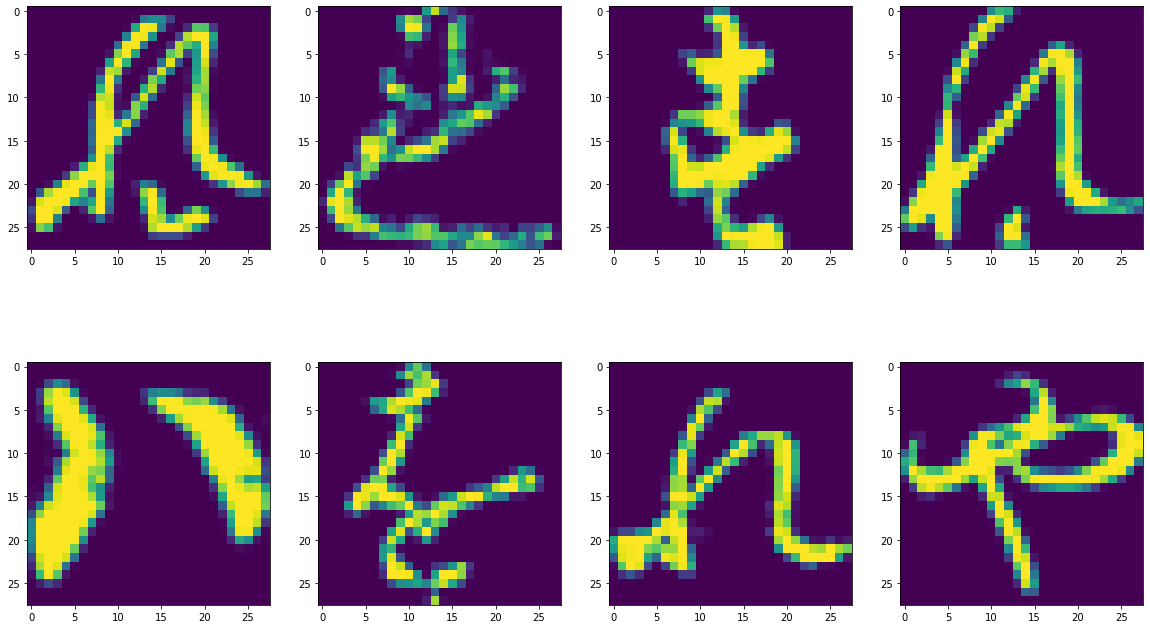

In [7]:
np.random.seed(23)

indices = np.random.choice(60000,10000)
X = kmnist[indices]

plt.figure(figsize=(20,12))

plt.subplot(2,4,1)
plt.imshow(X[0].reshape(28,28))

plt.subplot(2,4,2)
plt.imshow(X[1].reshape(28,28))

plt.subplot(2,4,3)
plt.imshow(X[2].reshape(28,28))

plt.subplot(2,4,4)
plt.imshow(X[3].reshape(28,28))

plt.subplot(2,4,5)
plt.imshow(X[4].reshape(28,28))

plt.subplot(2,4,6)
plt.imshow(X[5].reshape(28,28))

plt.subplot(2,4,7)
plt.imshow(X[6].reshape(28,28))

plt.subplot(2,4,8)
plt.imshow(X[7].reshape(28,28))

plt.show()

Plot two-dimensional t-SNE representation

In [8]:
XX = [np.concatenate([X[i][r] for r in range(28)]) for i in range(X.shape[0])]
XX = np.array(XX)


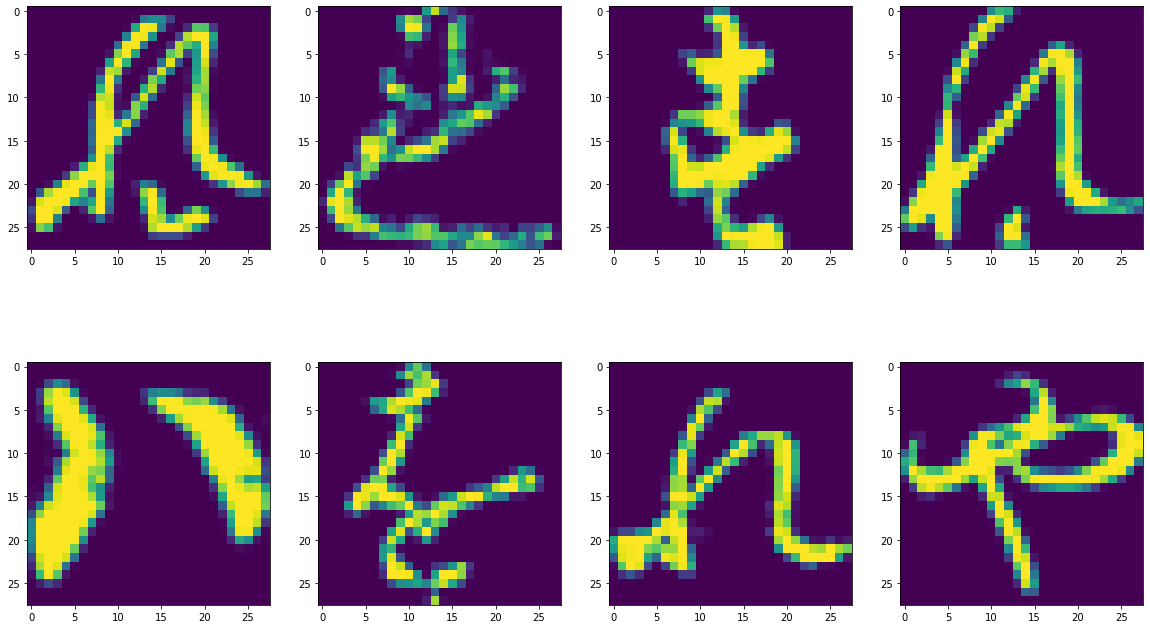

In [9]:
np.random.seed(23)

plt.figure(figsize=(20,12))

plt.subplot(2,4,1)
plt.imshow(XX[0].reshape(28,28))

plt.subplot(2,4,2)
plt.imshow(XX[1].reshape(28,28))

plt.subplot(2,4,3)
plt.imshow(XX[2].reshape(28,28))

plt.subplot(2,4,4)
plt.imshow(XX[3].reshape(28,28))

plt.subplot(2,4,5)
plt.imshow(XX[4].reshape(28,28))

plt.subplot(2,4,6)
plt.imshow(XX[5].reshape(28,28))

plt.subplot(2,4,7)
plt.imshow(XX[6].reshape(28,28))

plt.subplot(2,4,8)
plt.imshow(XX[7].reshape(28,28))

plt.show()

In [10]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

scaler = StandardScaler()
X_std = scaler.fit_transform(XX)

pca = PCA(n_components=2).fit_transform(X_std)
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300).fit_transform(X_std)
umap_output = umap.UMAP().fit_transform(X_std)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.753s...
[t-SNE] Computed neighbors for 10000 samples in 135.868s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 7.145591
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.623886
[t-SNE] KL divergence after 300 iterations: 2.920896


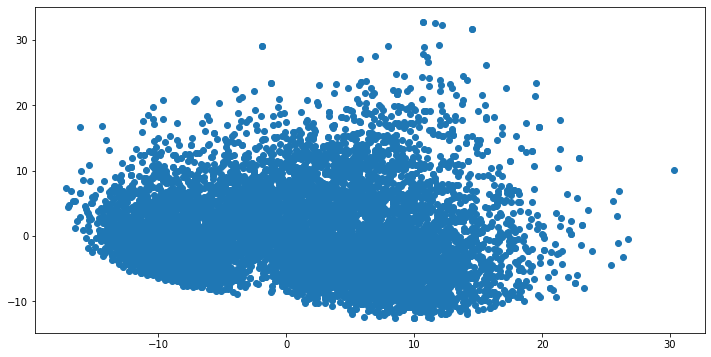

In [11]:
plt.figure(figsize=(12,6))
plt.scatter([x[0] for x in pca], [x[1] for x in pca])
plt.show()

Doesn't look like PCA will be helpful to differentiate between classes.

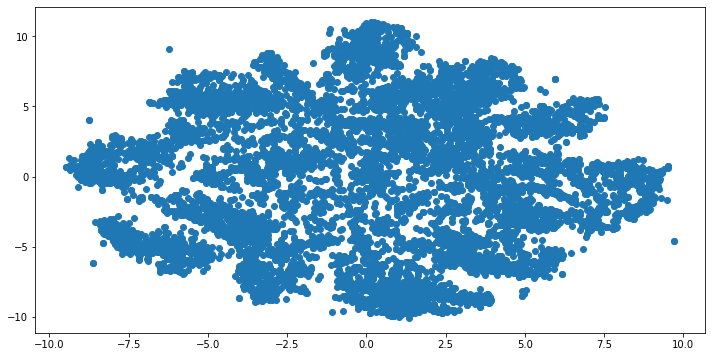

In [12]:
plt.figure(figsize=(12,6))
plt.scatter([x[0] for x in tsne], [x[1] for x in tsne])
plt.show()

A little more separation

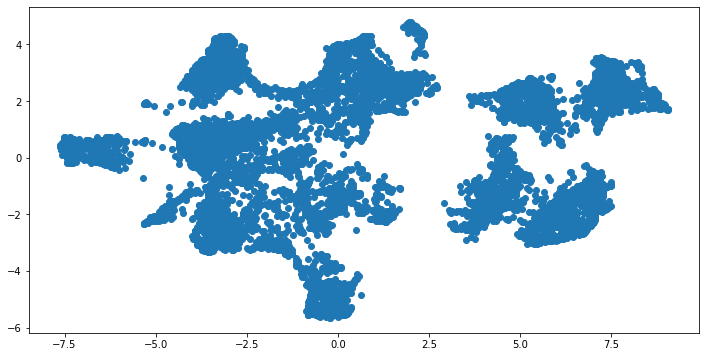

In [13]:
plt.figure(figsize=(12,6))
plt.scatter([x[0] for x in umap_output], [x[1] for x in umap_output])
plt.show()

The clearest clusters of the visualizations we've seen, but let's see if we can improve on t-SNE by running it for more iterations.

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.696s...
[t-SNE] Computed neighbors for 10000 samples in 118.961s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 7.145591
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.623161
[t-SNE] KL divergence after 1500 iterations: 1.812014


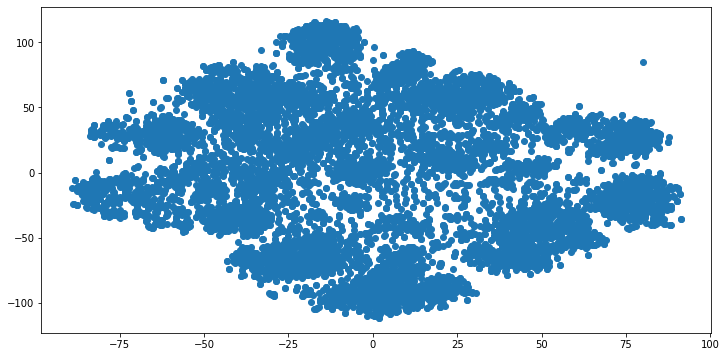

In [14]:
tsne2 = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1500).fit_transform(X_std)
plt.figure(figsize=(12,6))
plt.scatter([x[0] for x in tsne2], [x[1] for x in tsne2])
plt.show()

Going to say that UMAP is probably our best bet for dimensionality reduction. Even without tuning parameters, it has several distinct clusters and clear separation between them.

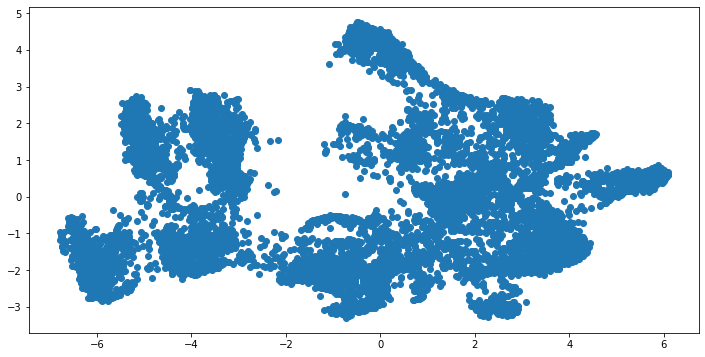

In [15]:
umap_output2 = umap.UMAP(n_neighbors=50).fit_transform(X_std)

plt.figure(figsize=(12,6))
plt.scatter([x[0] for x in umap_output2], [x[1] for x in umap_output2])
plt.show()

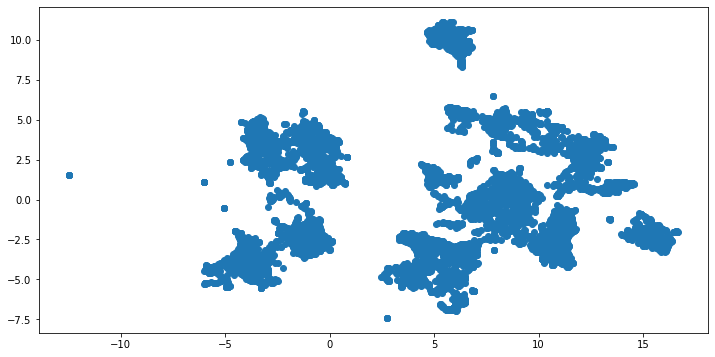

In [16]:
umap_output3 = umap.UMAP(n_neighbors=5).fit_transform(X_std)

plt.figure(figsize=(12,6))
plt.scatter([x[0] for x in umap_output3], [x[1] for x in umap_output3])
plt.show()

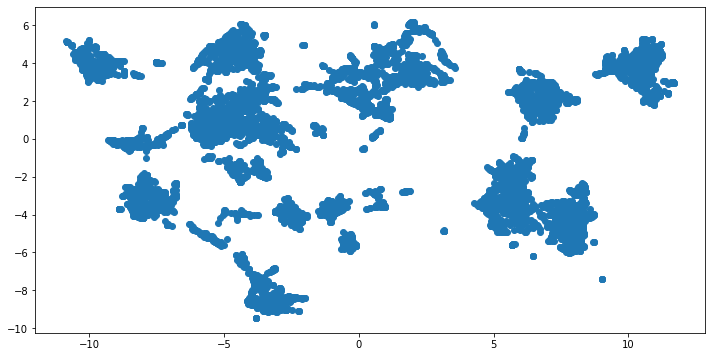

In [17]:
umap_output3 = umap.UMAP(n_neighbors=5, min_dist=.05).fit_transform(X_std)

plt.figure(figsize=(12,6))
plt.scatter([x[0] for x in umap_output3], [x[1] for x in umap_output3])
plt.show()

This looks like a decent amount of separation and clarity. Next we use different clustering algorithms to try and classify the images into (hopefully) 10 different classes.

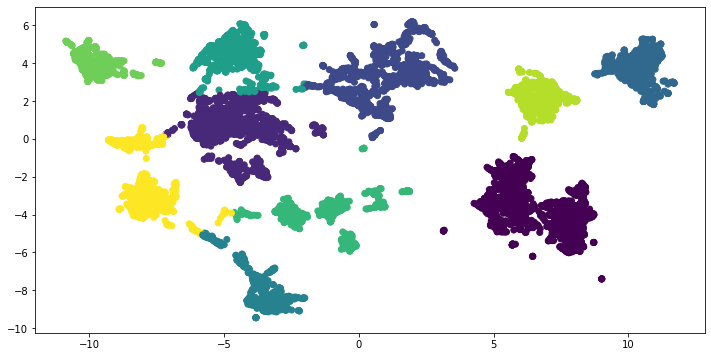

In [19]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=23).fit_predict(umap_output3)

In [24]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(linkage='average', affinity='cosine', n_clusters=10).fit_predict(umap_output3)



In [25]:
from sklearn.cluster import DBSCAN

db = DBSCAN().fit_predict(umap_output3)

In [26]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=10).fit_predict(umap_output3)

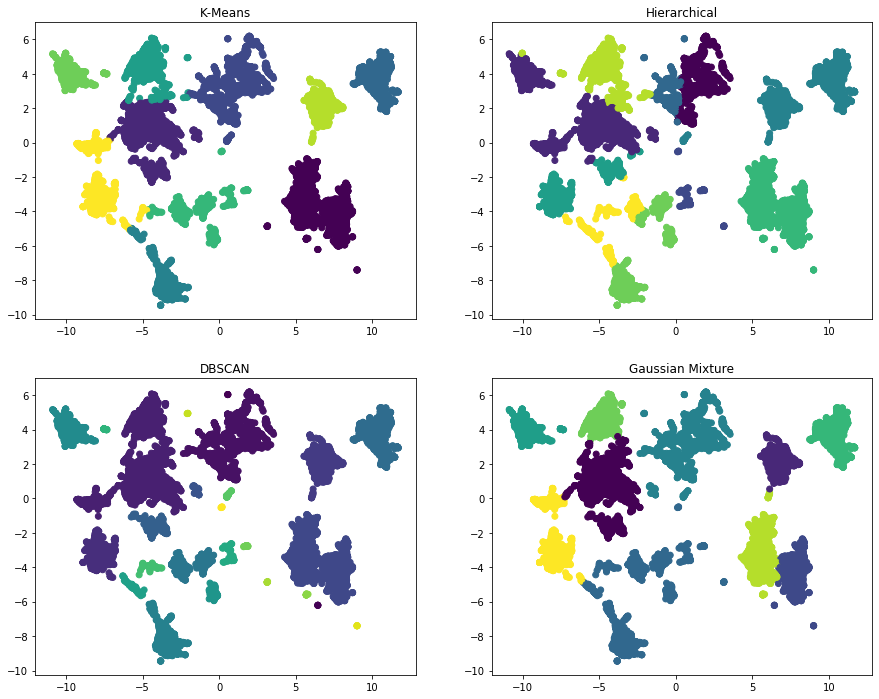

In [27]:
plt.figure(figsize=(15,12))

plt.subplot(2,2,1)
plt.title('K-Means')
plt.scatter([x[0] for x in umap_output3], [x[1] for x in umap_output3], c=kmeans)

plt.subplot(2,2,2)
plt.title('Hierarchical')
plt.scatter([x[0] for x in umap_output3], [x[1] for x in umap_output3], c=agg)

plt.subplot(2,2,3)
plt.title('DBSCAN')
plt.scatter([x[0] for x in umap_output3], [x[1] for x in umap_output3], c=db)

plt.subplot(2,2,4)
plt.title('Gaussian Mixture')
plt.scatter([x[0] for x in umap_output3], [x[1] for x in umap_output3], c=gm)

plt.show()

K-means and Gaussian seem to be the most sensible solutions. DBSCAN groups a very large area into a single cluster while also making a couple outlier points their own cluster, when they realistically should be grouped in with the next nearby cluster. The Hierarchical solution is someone unintuitive as well.

In [33]:
from sklearn import metrics

print('Silhouette Score, K-means:      {}'.format(metrics.silhouette_score(umap_output3, kmeans)))
print('Silhouette Score, Hierarchical: {}'.format(metrics.silhouette_score(umap_output3, agg)))
print('Silhouette Score, DBSCAN:       {}'.format(metrics.silhouette_score(umap_output3, db)))
print('Silhouette Score, Gaussian:     {}'.format(metrics.silhouette_score(umap_output3, gm)))

Silhouette Score, K-means:      0.5902035236358643
Silhouette Score, Hierarchical: 0.3691808879375458
Silhouette Score, DBSCAN:       0.3059444725513458
Silhouette Score, Gaussian:     0.5457693934440613


K-means scores the highest, with Gaussian following closely behind. I've refrained from looking at the target labels until now. The following code loads the correct labels, and checks the ARI score for all 4 of our clustering methods.

In [36]:
labels = np.load('kmnist-train-labels.npz')['arr_0']

print('ARI Score, K-Means:      {}'.format(metrics.adjusted_rand_score(labels[indices], kmeans)))
print('ARI Score, Hierarchical: {}'.format(metrics.adjusted_rand_score(labels[indices], agg)))
print('ARI Score, DBSCAN:       {}'.format(metrics.adjusted_rand_score(labels[indices], db)))
print('ARI Score, Gaussian:     {}'.format(metrics.adjusted_rand_score(labels[indices], gm)))

ARI Score, K-Means:      0.46488206717851577
ARI Score, Hierarchical: 0.3774718689323914
ARI Score, DBSCAN:       0.38455690636211937
ARI Score, Gaussian:     0.45922661915357477


The chart below looks at how well our algorithms did at isolating each specific label.

The vertical axis (rows) is the actual label, and the columns are the assigned clusters. Some, such as our cluster 3, was almost entirely made up of the same letter, and correctly identified about 84% of those letters. Some, like cluster 2, did not do a good job of correctly identifying a unique letter.

In [38]:
pd.crosstab(labels[indices], kmeans)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,22,9,67,863,4,3,3,0,52,2
1,1,19,240,1,1,761,2,7,2,5
2,10,322,107,0,4,9,0,5,0,548
3,628,24,270,0,4,11,41,1,20,3
4,7,281,20,35,20,19,586,2,17,15
5,32,15,30,1,0,4,0,24,608,235
6,24,863,29,2,2,7,36,13,2,14
7,924,22,8,3,14,13,11,4,19,19
8,0,18,471,1,2,18,0,463,12,6
